In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

#import plotly
#plotly.tools.set_credentials_file(username='opotowsky', api_key='FcAjopvgrck2vVsvcalR')


In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


## Predictions

In [8]:
# MWd/MTU
burn = pd.read_csv('../results/results_march2018_base-algs/lowburn_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('../results/results_march2018_base-algs/lowburn_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
burn.columns

Index(['Instance', 'Ridge', 'SVR', 'TrueY', 'kNN'], dtype='object')

## Scores

In [17]:
# MWd/MTU
b_scr = pd.read_csv('../results/results_march2018_base-algs/lowburn_burnup_scores.csv').rename(columns = {'Unnamed: 0':'Algorithm'})
# %u235
e_scr = pd.read_csv('../results/results_march2018_base-algs/lowburn_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'Algorithm'})
e_scr

,Algorithm,r2 Score,Explained Variance,Negative MAE,Negative RMSE
0,kNN,-2.506396,2.220446e-16,-1.580152,-1.868980
1,Ridge,-2522.802802,6.275601e-02,-50.132705,-50.142016
2,SVR,-1.785122,0.000000e+00,-1.333546,-1.665698


### Errors

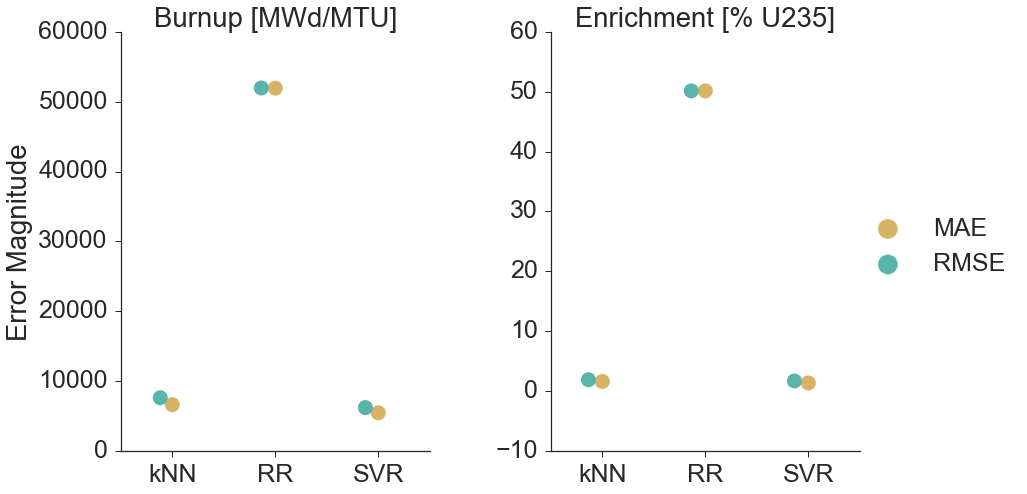

In [16]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)
b = b_scr.loc[:, ['Algorithm', 'Negative MAE', 'Negative RMSE']]
e = e_scr.loc[:, ['Algorithm', 'Negative MAE', 'Negative RMSE']]
b['Parameter'] = 'Burnup [MWd/MTU]'
e['Parameter'] = 'Enrichment [% U235]'

err = pd.DataFrame()
err = pd.concat([b, e])
err['MAE'] = -1 * err['Negative MAE']
err['RMSE'] = -1 * err['Negative RMSE']

err = err.melt(id_vars = ['Algorithm', 'Parameter'], 
               value_vars = ['MAE', 'RMSE'], 
               value_name='Error Magnitude', var_name='Error')

mer = sns.factorplot(x="Algorithm", y='Error Magnitude',
                     hue='Error', col="Parameter", ci=95,
                     sharey=False, s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=err, kind="swarm", size=8, aspect=.8)

(mer.set_axis_labels("", "Error Magnitude")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .add_legend(markerscale=2.5))
#mer.axes[0,0].set_ylim(0, 5300)
#mer.axes[0,1].set_ylim(0, 0.75)
mer.savefig('1error.png', bbox_inches='tight', transparent=True)

### Variance

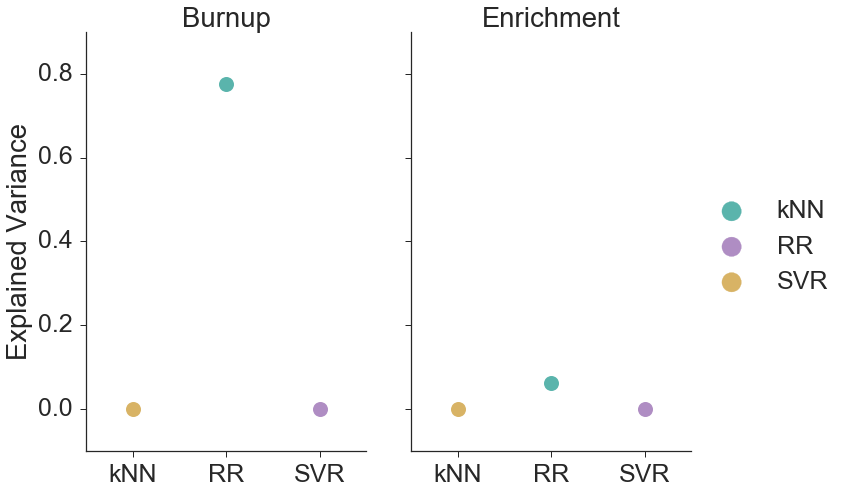

In [19]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)
b = b_scr.loc[:, ['Algorithm', 'Explained Variance']]
e = e_scr.loc[:, ['Algorithm', 'Explained Variance']]
b['Parameter'] = 'Burnup'
e['Parameter'] = 'Enrichment'
scr = pd.DataFrame()
scr = pd.concat([b, e])

var = sns.factorplot(x="Algorithm", y="Explained Variance",
                     hue="Algorithm", col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    #.set(ylim=(0.65, 1.0))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('1variance.png', bbox_inches='tight', transparent=True)

## Predictions

In [26]:
burn_gwd = burn.loc[:, ['SVR', 'TrueY', 'kNN', 'Ridge']]//1000
burn_gwd['Parameter'] = 'Burnup [GWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
burn_gwd.sample(3)

,SVR,TrueY,kNN,Ridge,Parameter
89,12.0,17,0.0,-40.0,Burnup [GWd/MTU]
74,12.0,9,0.0,-44.0,Burnup [GWd/MTU]
50,12.0,8,0.0,-44.0,Burnup [GWd/MTU]


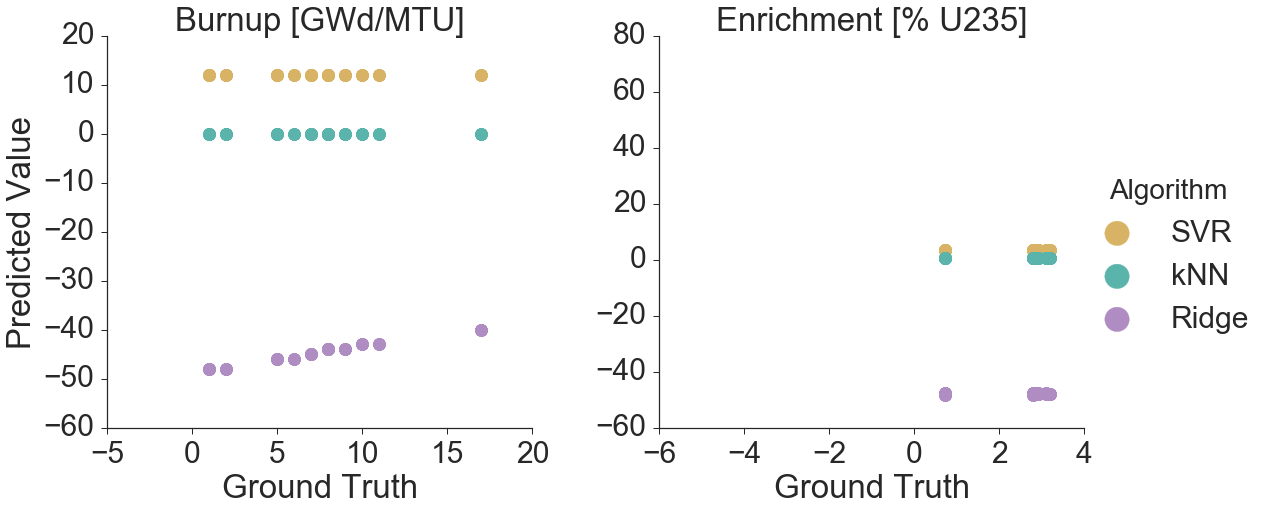

In [30]:
plt.clf()
sns.set(style="ticks", font_scale=3.0)

pred_df = pd.DataFrame()
pred_df = pd.concat([burn_gwd, enri])
pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
                 value_vars = ['SVR', 'kNN', 'Ridge'], 
                 value_name='Predicted Value', var_name='Algorithm')
pred = sns.FacetGrid(data=pred_df, col="Parameter",
                     hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
#pred.axes[0,0].set_ylim(-1, 20)
#pred.axes[0,0].set_xlim(-1, 20)
plt.plot([-5, -5], [65, 65], 'k-', linewidth=2)

pred.savefig('1predictions.png', bbox_inches='tight', transparent=True)